# Entrofy installation instruction

Please go to https://github.com/dhuppenkothen/entrofy#install-instructions and follow the installation instruction for Entrofy in order to run this notebook. 

You will also need the following packages to run this notebook:

* matplotlib
* numpy
* pandas


## Imports

In [1]:
%matplotlib inline

# Third Party Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local Imports
import entrofy

## Load Data

In [2]:
dem_data = pd.read_csv('simulated_sample.csv', usecols=np.arange(1,13))
dem_data.head()

Selected Abstract Location Will you require childcare assistance?  \
0                No       UC                                     No   
1                No       UC                                     No   
2                No       UC                                     No   
3               Yes       UC                                     No   
4                No       UC                                     No   

  Will you require financial support?  \
0                          No support   
1                        Full support   
2                          No support   
3                          No support   
4                          No support   

  Will you require further accommodation in order to fully participate in this meeting?  \
0                                                 No                                      
1                                                 No                                      
2                                                 No                                      
3                                                Yes                                      
4                                                 No                                      

  Do you self-identify as a person of color or otherwise a racial or ethnic minority?  \
0                                                 No                                    
1                                                 No                                    
2                                                 No                                    
3                                                 No                                    
4                                                 No                                    

  Do you self-identify as a gender minority in astronomy?  \
0                                                 No        
1                                                 No        
2                                                 No        
3                                                Yes        
4                                                Yes        

  Do you self-identify as trans and/or nonbinary?  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   

  Do you self-identify as a minority with respect to sexual orientation?  \
0                                                Yes                       
1                                                Yes                       
2                                                Yes                       
3                                                 No                       
4                                                Yes                       

  Do you self-identify as a minority with respect to disability, Deaf, and/or neurodiverse status?  \
0                                                 No                                                 
1                                                 No                                                 
2                                                 No                                                 
3                                                Yes                                                 
4                                                 No                                                 

  What stage are you at in your career, with respect to your highest level of education?   \
0                           Middle (10-30 years out)                                        
1                           Middle (10-30 years out)                                        
2                  Early (Student or 0-10 years out)                                        
3                  Early (Student or 0-10 years out)                                        
4                  Early 

Rename the columns to be easier to parse

*Naming Key:*

pre - POC, or otherwise racial or ethnic minority

gen - gender minority

tnb - trans or nonbinary

sor - sexual orientation minority

dnd - having a disability, neurodiverse, or Deaf

In [3]:
col_names = dem_data.columns.values.tolist()
new_col_names = ['pre_selected','location', 'childcare', 'financial', 'accommodation',
                 'pre_minority', 'gen_minority',
                 'tnb_minority', 'sor_minority', 'dnd_minority',
                 'career_stage', 'career_path']
dem_data = dem_data.rename(columns={col_names[i]:new_col_names[i]
                                    for i in range(len(col_names))})
dem_data.head()

pre_selected location childcare     financial accommodation pre_minority  \
0           No       UC        No    No support            No           No   
1           No       UC        No  Full support            No           No   
2           No       UC        No    No support            No           No   
3          Yes       UC        No    No support           Yes           No   
4           No       UC        No    No support            No           No   

  gen_minority tnb_minority sor_minority dnd_minority  \
0           No           No          Yes           No   
1           No           No          Yes           No   
2           No           No          Yes           No   
3          Yes           No           No          Yes   
4          Yes           No          Yes           No   

                        career_stage   career_path  
0           Middle (10-30 years out)  Non-academic  
1           Middle (10-30 years out)      Academic  
2  Early (Student or 0-10 years out)      Academic  
3  Early (Student or 0-10 years out)      Academic  
4  Early (Student or 0-10 years out)      Academic

Read the "pre_selected" list and add those indicies to our pre_selected_idx variable, then remove column

In [4]:
preselect = dem_data['pre_selected'][dem_data['pre_selected']=="Yes"].index.values
print("Indices of those preselected: {}".format(preselect))


# Drop this column so that it is not included in Entrofy final plotting 
dem_data.drop(columns=['pre_selected'],  inplace=True)
dem_data.head()

Indices of those preselected: [  3   6  23  29  30  31  67  80  82  93 110 115 131 141 179 206 224 226
 243 247 259]


location childcare     financial accommodation pre_minority gen_minority  \
0       UC        No    No support            No           No           No   
1       UC        No  Full support            No           No           No   
2       UC        No    No support            No           No           No   
3       UC        No    No support           Yes           No          Yes   
4       UC        No    No support            No           No          Yes   

  tnb_minority sor_minority dnd_minority                       career_stage  \
0           No          Yes           No           Middle (10-30 years out)   
1           No          Yes           No           Middle (10-30 years out)   
2           No          Yes           No  Early (Student or 0-10 years out)   
3           No           No          Yes  Early (Student or 0-10 years out)   
4           No          Yes           No  Early (Student or 0-10 years out)   

    career_path  
0  Non-academic  
1      Academic  
2      Academic  
3      Academic  
4      Academic

## Get total number/percentage of applicants for each 

In [5]:
total_number_of_applicants = len(dem_data['location']) 
print("Total number of applicants: {}".format(total_number_of_applicants))

Total number of applicants: 266


In [6]:
# Numbers
## Demographics
pre_minority_yes = (dem_data['pre_minority']=='Yes').sum()
gen_minority_yes = (dem_data['gen_minority']=='Yes').sum()
tnb_minority_yes = (dem_data['tnb_minority']=='Yes').sum()
sor_minority_yes = (dem_data['sor_minority']=='Yes').sum()
dnd_minority_yes = (dem_data['dnd_minority']=='Yes').sum()

## Career
career_stage_early = (dem_data['career_stage']=='Early (Student or 0-10 years out)').sum()
career_stage_mid = (dem_data['career_stage']=='Middle (10-30 years out)').sum()
career_stage_late = (dem_data['career_stage']=='Senior (30+ years out)').sum()
career_path_academic = (dem_data['career_path']=='Academic').sum()
career_path_nonacademic = (dem_data['career_path']=='Non-academic').sum()

## Support and Accommodations
childcare_yes = (dem_data['childcare']=='Yes').sum()
childcare_notsure = (dem_data['childcare']=='Not Sure').sum()
financial_full = (dem_data['financial']=='Full support').sum()
financial_partial = (dem_data['financial']=='Partial support').sum()
accommodation_yes = (dem_data['accommodation']=='Yes').sum()

## Other
location_uc = (dem_data['location']=='UC').sum()
location_we = (dem_data['location']=='WE').sum()
location_o = (dem_data['location']=='O').sum()

In [7]:
# Percentages
## Demographics
pre_percent = pre_minority_yes / total_number_of_applicants
gen_percent = gen_minority_yes / total_number_of_applicants
tnb_percent = tnb_minority_yes / total_number_of_applicants
sor_percent = sor_minority_yes / total_number_of_applicants
dnd_percent = dnd_minority_yes / total_number_of_applicants

## Career
early_percent = career_stage_early / total_number_of_applicants
mid_percent = career_stage_mid / total_number_of_applicants
late_percent = career_stage_late / total_number_of_applicants
acadamic_percent = career_path_academic / total_number_of_applicants
nonacademic_percent = career_path_nonacademic / total_number_of_applicants

## Support and Accommodations
childcare_percent = childcare_yes / total_number_of_applicants
chilcare_ns_percent = childcare_notsure / total_number_of_applicants
financial_full_percent = financial_full / total_number_of_applicants
financial_partial_percent = financial_partial / total_number_of_applicants
accommodation_percent = accommodation_yes / total_number_of_applicants

## Other
uc_percent = location_uc / total_number_of_applicants
we_percent = location_we / total_number_of_applicants
o_percent = location_o / total_number_of_applicants

In [8]:
verbose = True

if verbose:
    print("DEMOGRAPHICS")
    print("Number/percentage of applicants that answered 'Yes' to being a racial minority: {}/{:.1%}".format(pre_minority_yes, pre_percent))
    print("Number/percentage of applicants that answered 'Yes' to being a gender minority: {}/{:.1%}".format(gen_minority_yes, gen_percent))
    print("Number/percentage of applicants that answered 'Yes' to being trans or tnb_minority: {}/{:.1%}".format(tnb_minority_yes, tnb_percent))
    print("Number/percentage of applicants that answered 'Yes' to being a sexual orientation minority: {}/{:.1%}".format(sor_minority_yes, sor_percent))
    print("Number/percentage of applicants that answered 'Yes' to having a disability or being Deaf or neurodiverse: {}/{:.1%}".format(dnd_minority_yes, dnd_percent))
    print('\n')
    print("CAREER")
    print("Number/percentage of applicants that are early career: {}/{:.1%}".format(career_stage_early, early_percent))
    print("Number/percentage of applicants that are mid career: {}/{:.1%}".format(career_stage_mid, mid_percent))
    print("Number/percentage of applicants that are late career: {}/{:.1%}".format(career_stage_late, late_percent))
    print("Number/percentage of applicants that are in academia: {}/{:.1%}".format(career_path_academic, acadamic_percent))
    print("Number/percentage of applicants that are not in academia: {}/{:.1%}".format(career_path_nonacademic, nonacademic_percent))
    print('\n')
    print("SUPPORT AND ACCOMMODATIONS")
    print("Number/percentage of applicants that need chilcare support: {}/{:.1%}".format(childcare_yes, childcare_percent))
    print("Number/percentage of applicants that might need childcare support: {}/{:.1%}".format(childcare_notsure, chilcare_ns_percent))
    print("Number/percentage of applicants that need full financial support: {}/{:.1%}".format(financial_full, financial_full_percent))
    print("Number/percentage of applicants that need partial financial support: {}/{:.1%}".format(financial_partial, financial_partial_percent))
    print("Number/percentage of applicants that need accommodations: {}/{:.1%}".format(accommodation_yes, accommodation_percent))
    print('\n')
    print("LOCATION")
    print("Number/percentage of applicants from US/Canada: {}/{:.1%}".format(location_uc, uc_percent))
    print("Number/percentage of applicants from Western Europe: {}/{:.1%}".format(location_we, we_percent))
    print("Number/percentage of applicants from outside US/Canada/Western Europe: {}/{:.1%}".format(location_o, o_percent))
    

DEMOGRAPHICS
Number/percentage of applicants that answered 'Yes' to being a racial minority: 21/7.9%
Number/percentage of applicants that answered 'Yes' to being a gender minority: 170/63.9%
Number/percentage of applicants that answered 'Yes' to being trans or tnb_minority: 20/7.5%
Number/percentage of applicants that answered 'Yes' to being a sexual orientation minority: 73/27.4%
Number/percentage of applicants that answered 'Yes' to having a disability or being Deaf or neurodiverse: 44/16.5%


CAREER
Number/percentage of applicants that are early career: 165/62.0%
Number/percentage of applicants that are mid career: 79/29.7%
Number/percentage of applicants that are late career: 20/7.5%
Number/percentage of applicants that are in academia: 195/73.3%
Number/percentage of applicants that are not in academia: 68/25.6%


SUPPORT AND ACCOMMODATIONS
Number/percentage of applicants that need chilcare support: 6/2.3%
Number/percentage of applicants that might need childcare support: 9/3.4%
Nu

In [9]:
# If only take "yes"s, how many people is that? (exclude gender minority)
# ignoring intersectionality
total_yes = pre_minority_yes + tnb_minority_yes + sor_minority_yes + dnd_minority_yes

print("Total number of yeses: {}".format(total_yes))

Total number of yeses: 158


# Entrofy settings

Choose the weights: We set the weights to be equal.

In [10]:
weights = {c:1 for c in dem_data.columns}

We'll mark each of the columns as categorical variables (rather than continuous)

In [11]:
data_types = {c:'categorical' for c in dem_data.columns}

Put these into an entrofy mapper object

In [12]:
mappers = entrofy.core.construct_mappers(dem_data, weights, datatypes=data_types)

Make a pretty plot

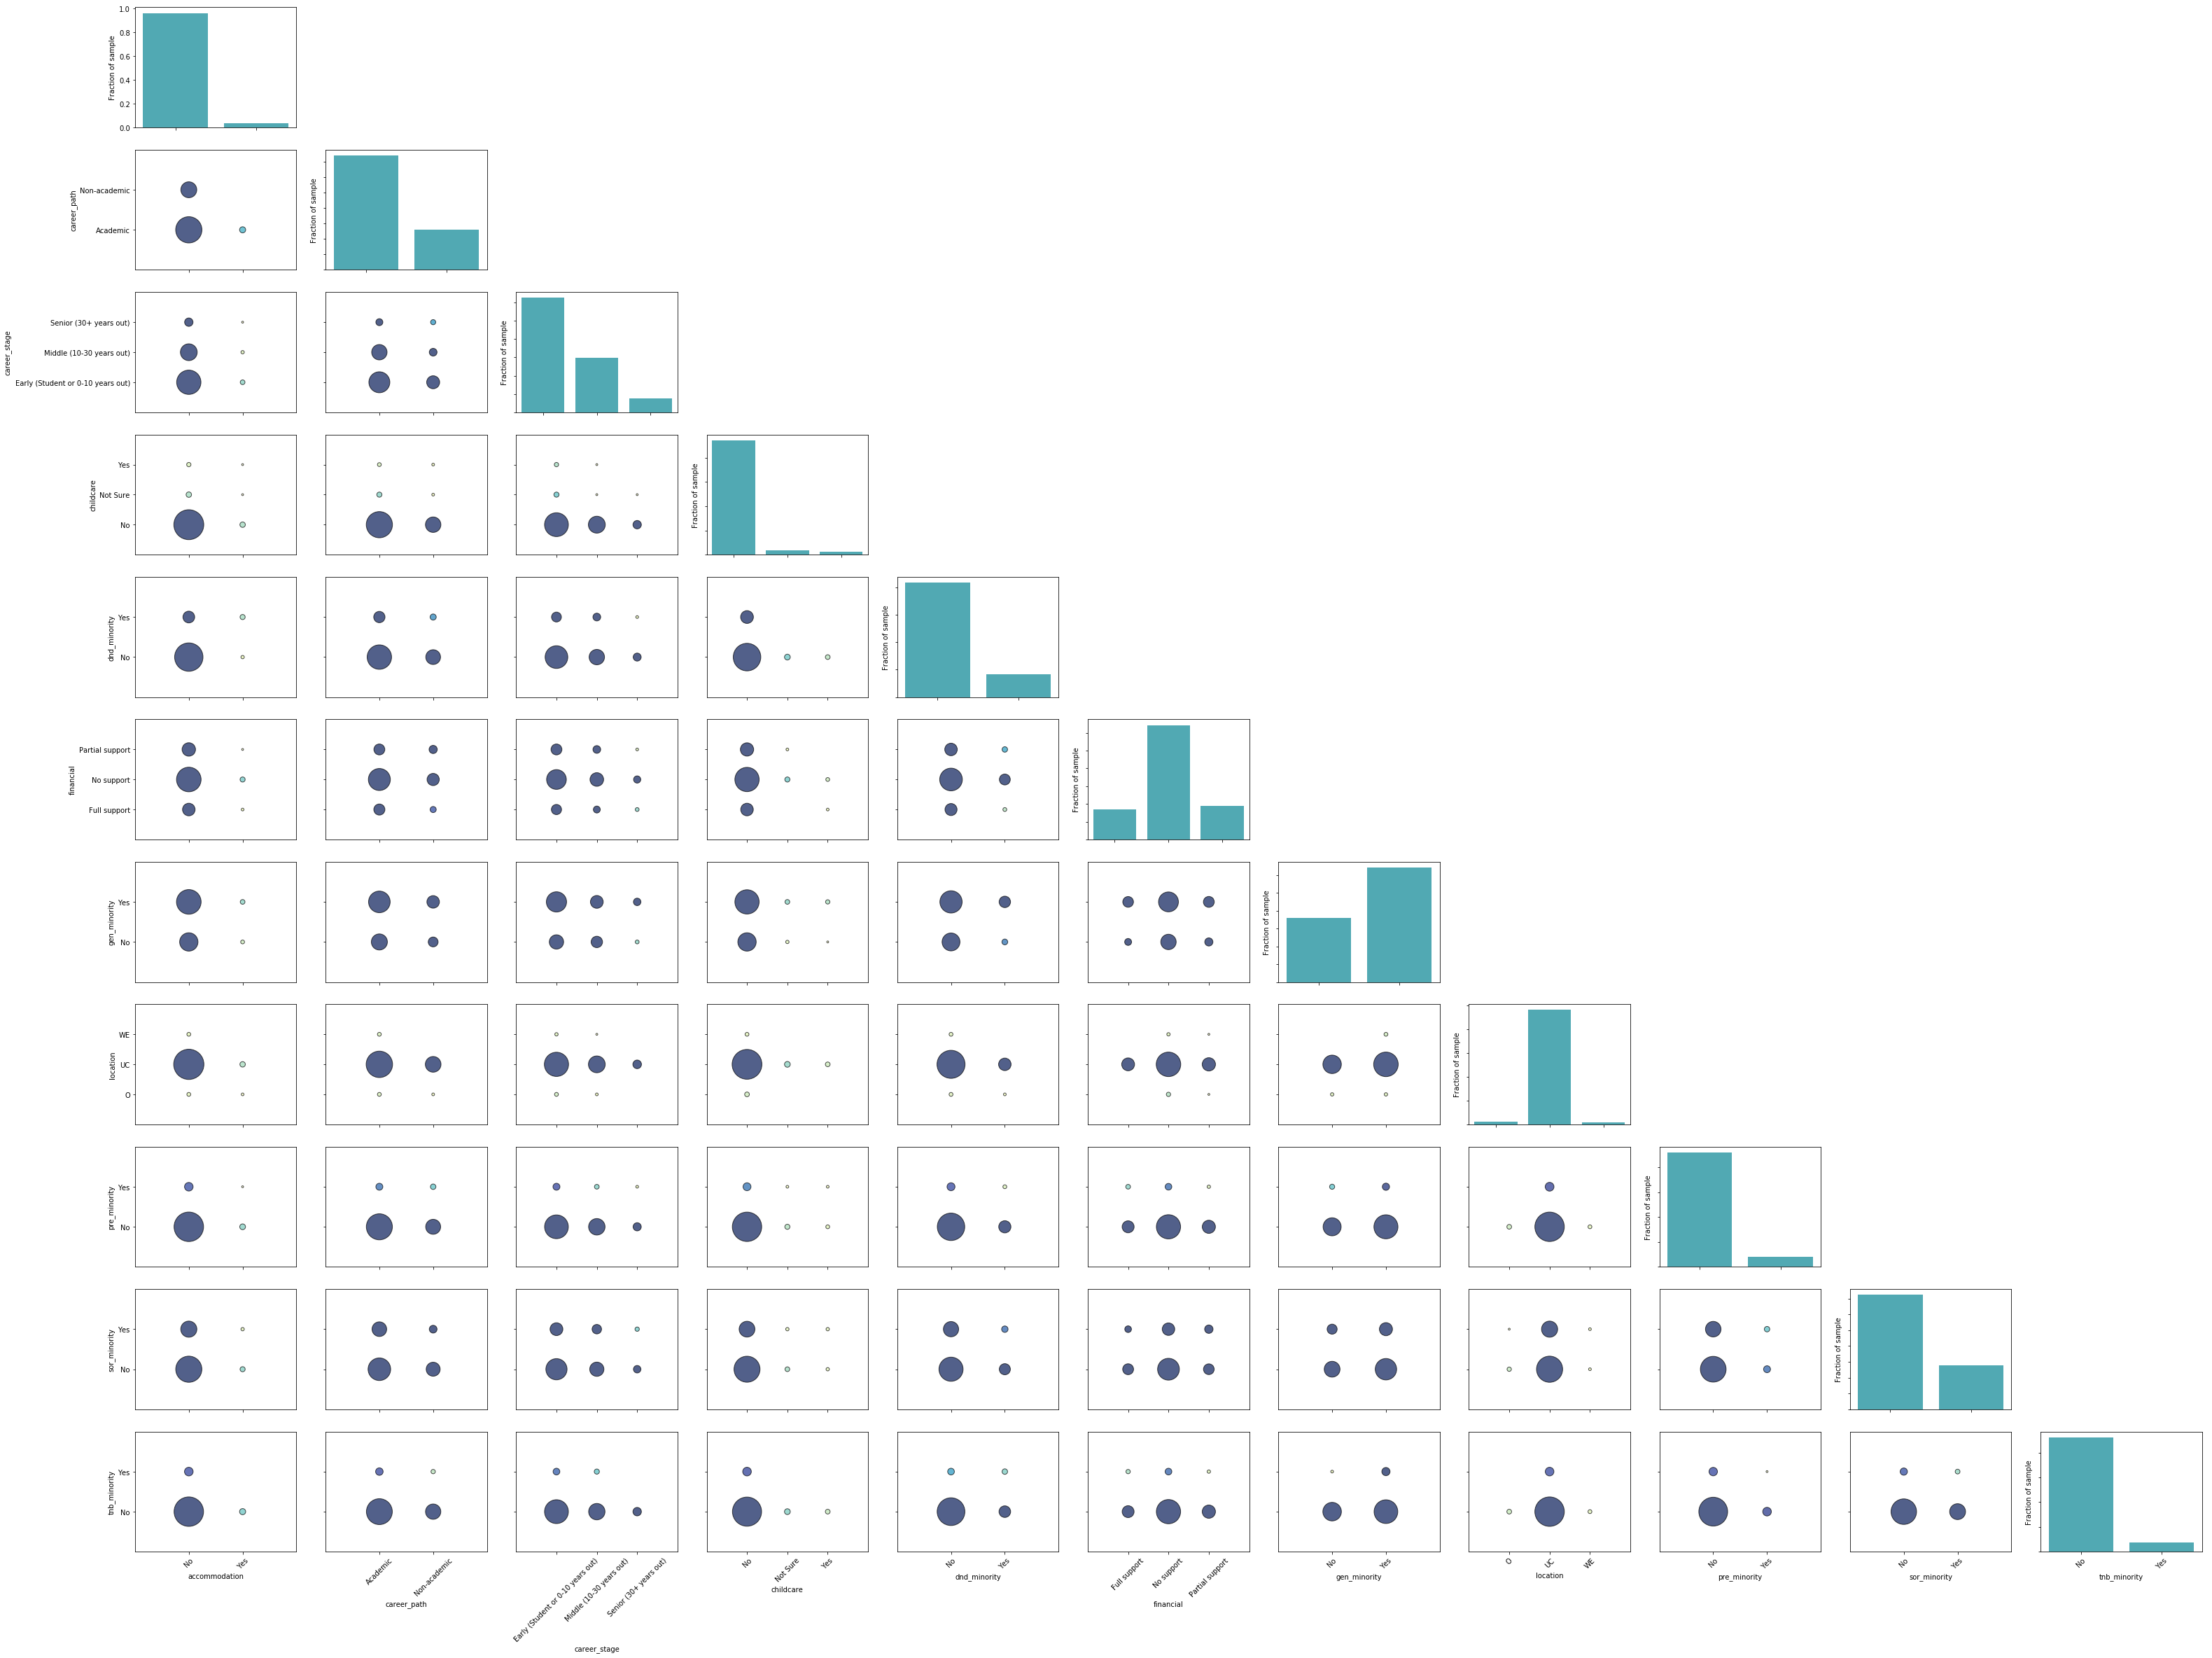

In [13]:
fig, axes = entrofy.plotting.plot_triangle(dem_data, weights, mappers=mappers)

## Targets

### There are two ways to think about the values: 

* Values add up to 1: We are aiming for these exact proportions.

* Values add up to <1: The values are the minimum fraction we want for a given category. After the target is reached, the rest are randomly selected.

A note about targets:

A target value requires a minimum representation of that value in the final selected group. During selection, once that target is reach, if there are still open spots in the selected group, indices are randomly selected. A target of 0.0 means that there is no constraint on this category. 

### Categories that did influence selection

#### Do you self-identify as a person of color or otherwise a racial or ethnic minority?

In [14]:
dem_data['pre_minority'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
mappers['pre_minority'].targets['Yes'] = pre_percent
mappers['pre_minority'].targets['No'] = 0.0

#### Do you self-identify as a gender minority in astronomy?

In [16]:
dem_data['gen_minority'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
mappers['gen_minority'].targets['Yes'] = gen_percent
mappers['gen_minority'].targets['No'] = 0.0

#### Do you self-identify as trans and/or nonbinary?

In [18]:
dem_data['tnb_minority'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
mappers['tnb_minority'].targets['Yes'] = tnb_percent
mappers['tnb_minority'].targets['No'] = 0.0

#### Do you self-identify as a minority with respect to sexual orientation?

In [20]:
dem_data['sor_minority'].unique()

array(['Yes', 'No', nan], dtype=object)

In [21]:
mappers['sor_minority'].targets['Yes'] = sor_percent
mappers['sor_minority'].targets['No'] = 0.0

#### Do you self-identify as a minority with respect to disability, Deaf, and/or neurodiverse status?

In [22]:
dem_data['dnd_minority'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
mappers['dnd_minority'].targets['Yes'] = dnd_percent
mappers['dnd_minority'].targets['No'] = 0.0

#### What stage are you at in your career, with respect to your highest level of education?

In [24]:
dem_data['career_stage'].unique()

array(['Middle (10-30 years out)', 'Early (Student or 0-10 years out)',
       'Senior (30+ years out)', nan], dtype=object)

In [25]:
mappers['career_stage'].targets['Early (Student or 0-10 years out)'] = 0.53
mappers['career_stage'].targets['Middle (10-30 years out)'] = 0.38
mappers['career_stage'].targets['Senior (30+ years out)'] = 0.09

#### What is your location?

In [26]:
dem_data['location'].unique()

array(['UC', 'WE', 'O'], dtype=object)

In [27]:
mappers['location'].targets['UC'] = 0.0
mappers['location'].targets['WE'] = 0.02
mappers['location'].targets['O'] = 0.02

### Categories that did not influence selection

#### How would you categorize your current career path?

In [28]:
dem_data['career_path'].unique()

array(['Non-academic', 'Academic', nan], dtype=object)

In [29]:
mappers['career_path'].targets['Academic'] = 0.0
mappers['career_path'].targets['Non-academic (Industry, government, non-profit, etc.)'] = 0.0

#### Do you need childsupport

In [30]:
dem_data['childcare'].unique()

array(['No', 'Yes', 'Not Sure'], dtype=object)

In [31]:
mappers['childcare'].targets['Yes'] = 0.0
mappers['childcare'].targets['No'] = 0.0
mappers['childcare'].targets['Not Sure'] = 0.0

#### Do you need financial support?

In [32]:
dem_data['financial'].unique()

array(['No support', 'Full support', 'Partial support'], dtype=object)

In [33]:
mappers['financial'].targets['No support'] = 0.0
mappers['financial'].targets['Partial support'] = 0.0
mappers['financial'].targets['Full support (Registration, travel, accommodation, and meals)'] = 0.0

#### Do you need any additional accommodation? 

In [34]:
dem_data['accommodation'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
mappers['accommodation'].targets['Yes'] = 0.0
mappers['accommodation'].targets['No'] = 0.0

## Run Entrofy

To keep it from being confused about multiple columns having "Yes"/"No" as options, we'll prepend those with a label.

In [36]:
for key in mappers.keys():
    mappers[key].prefix = key + "_"

Run entrofy! (uncomment to add in pre-select column later)

In [37]:
n_participants = 152
idx, max_score = entrofy.core.entrofy(dem_data, n_participants, 
                                      pre_selects=preselect,
                                      mappers=mappers,
                                      weights=weights, seed=20)

Make a data set with just the selected attendees

In [38]:
data_out = dem_data.loc[idx]

Make an everything vs everything plot with these

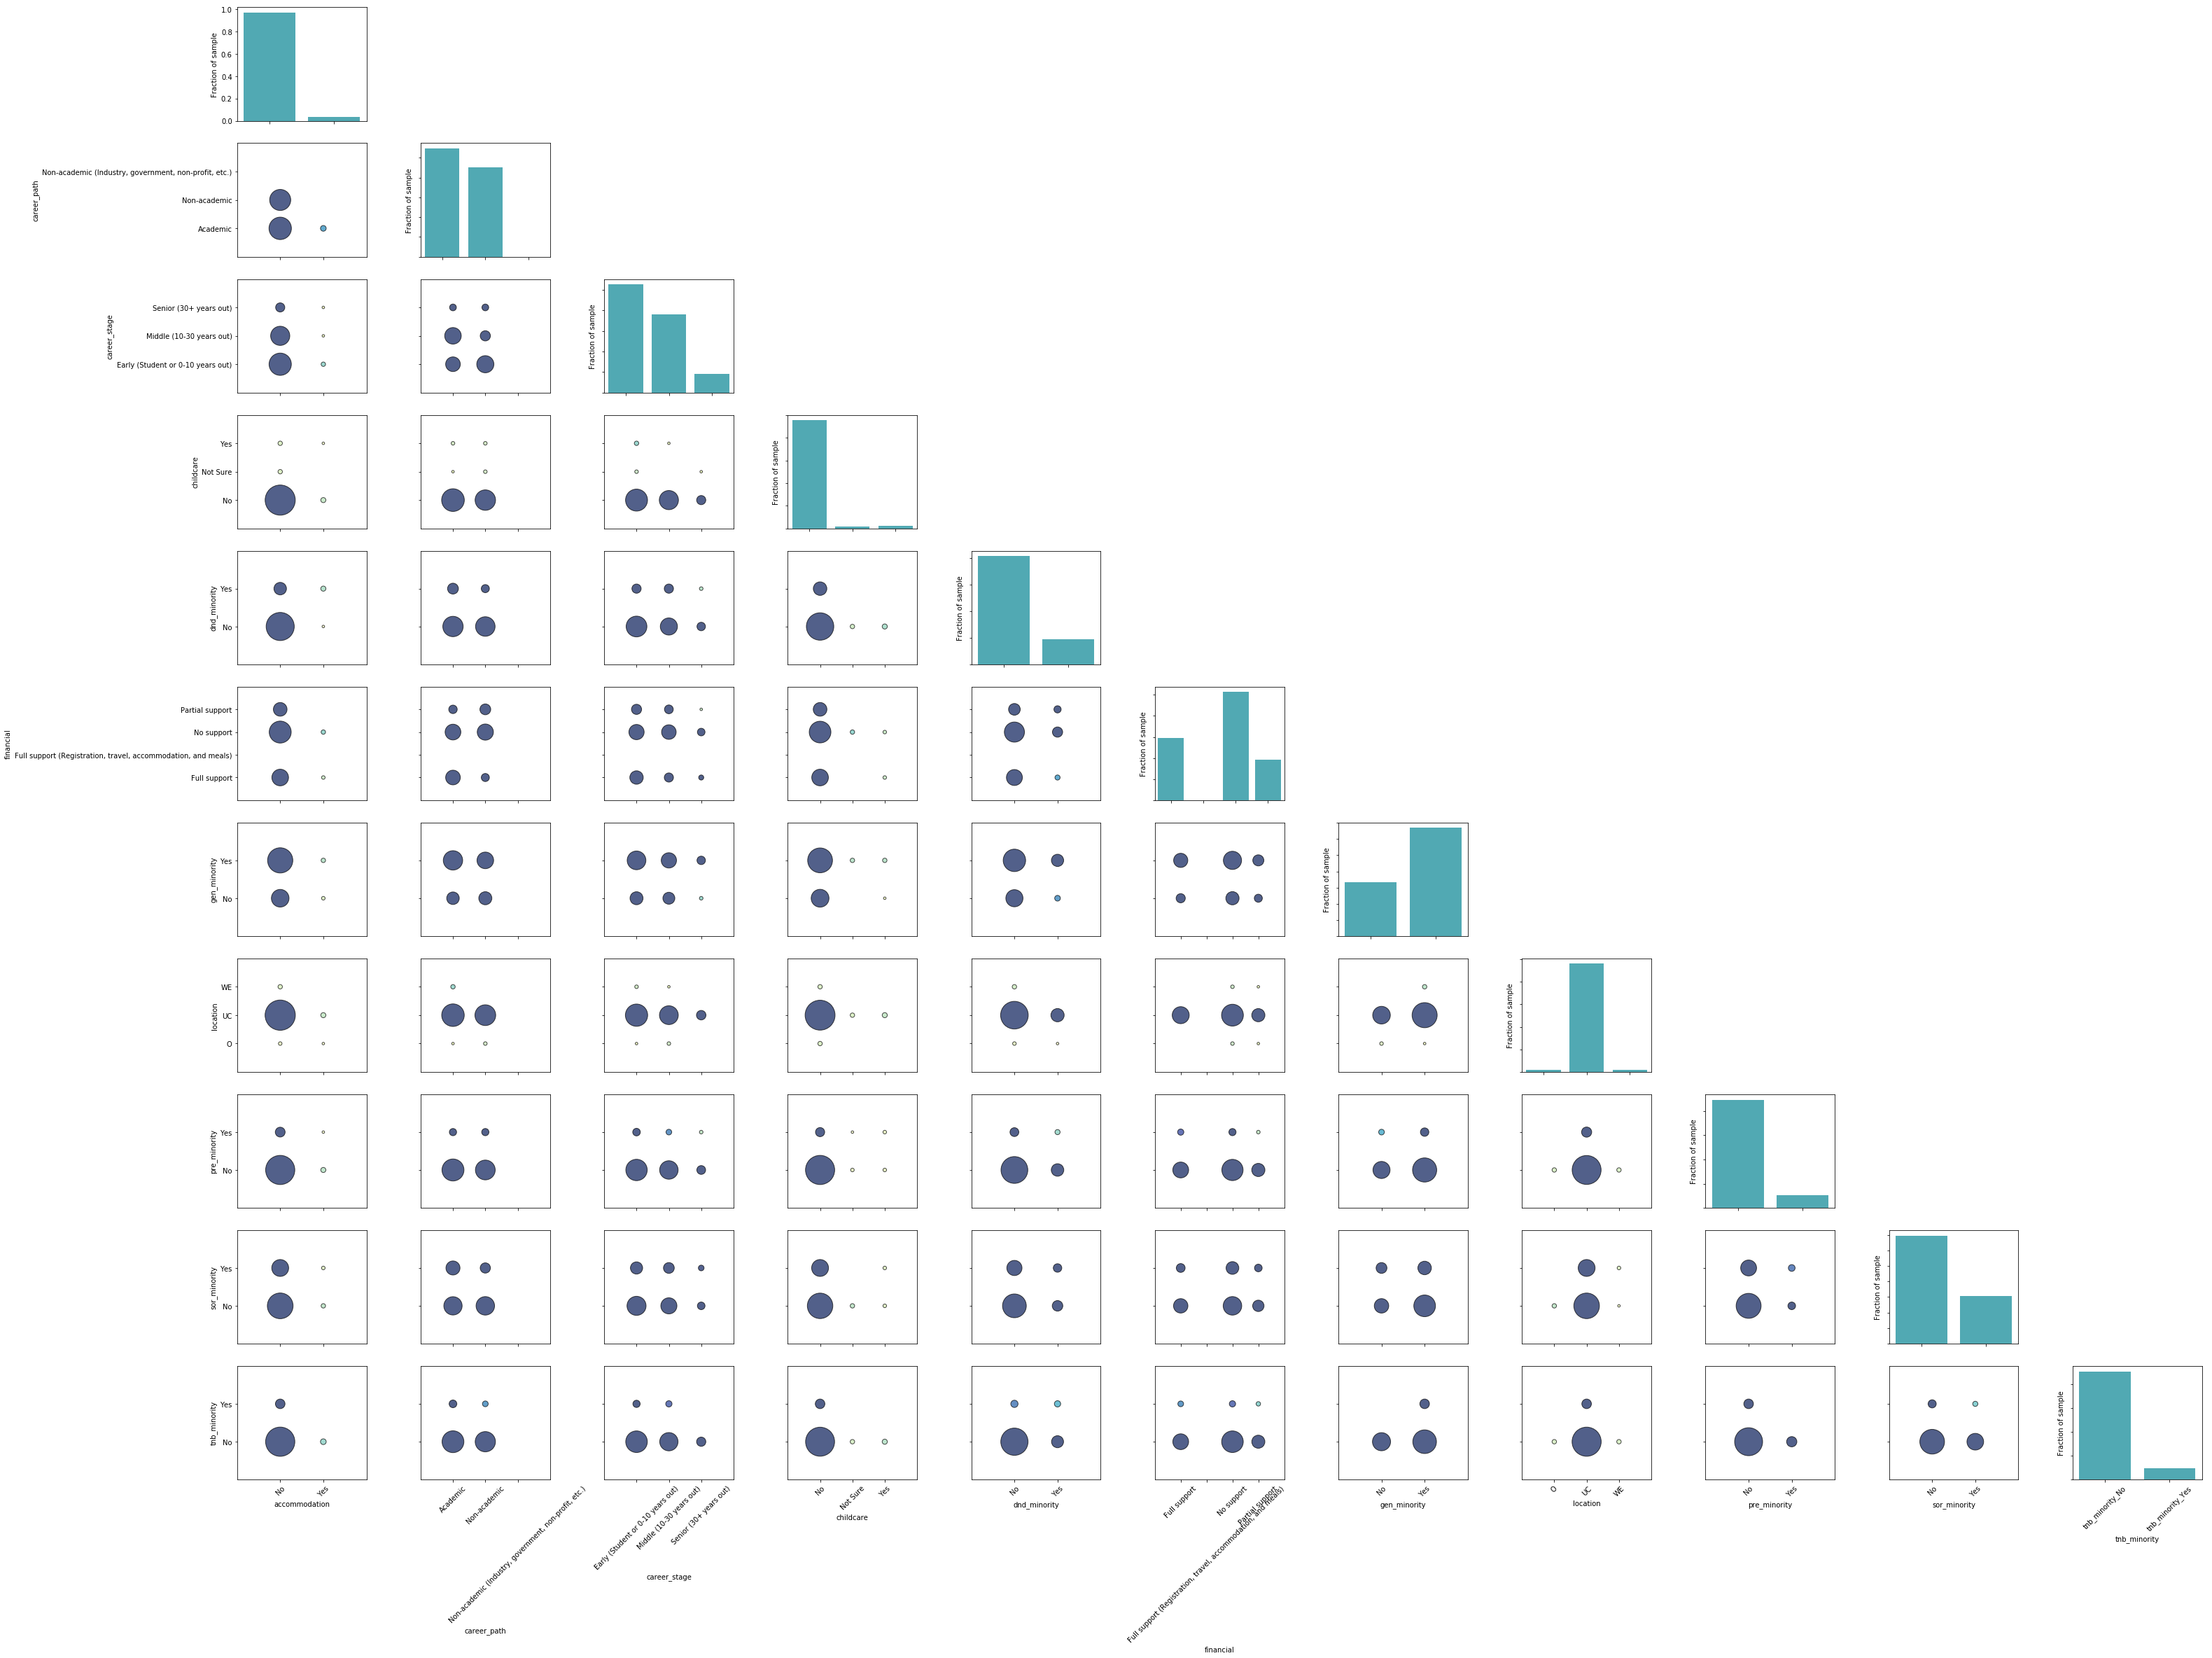

In [39]:
fig, axes = entrofy.plotting.plot_triangle(data_out, weights, mappers=mappers)

Histograms of everything

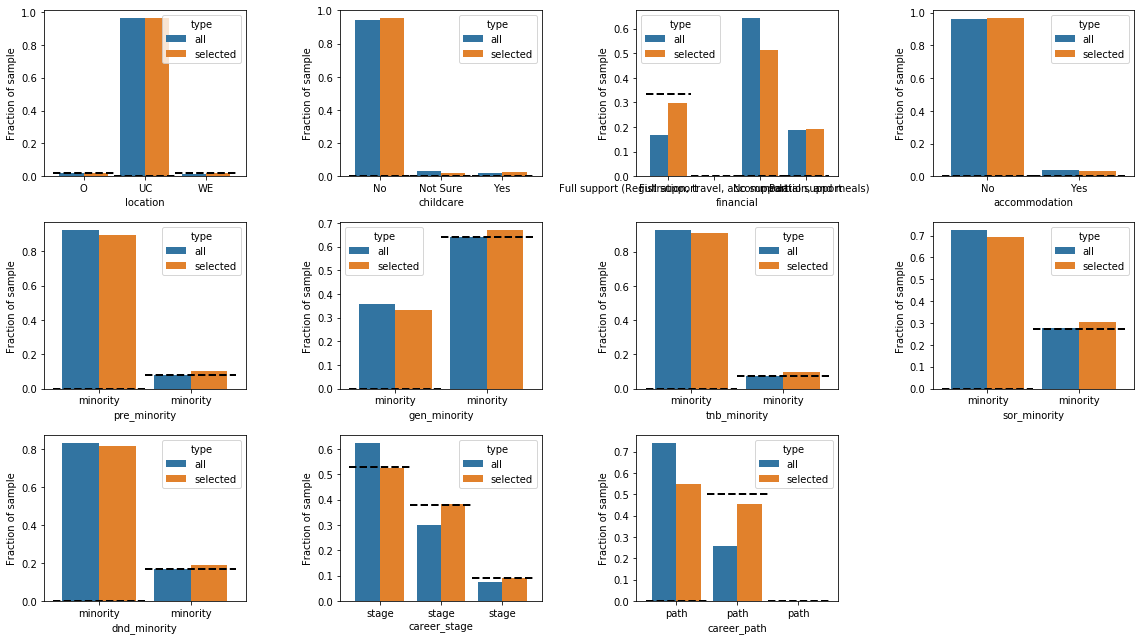

In [40]:
_ = entrofy.plotting.plot(dem_data, idx, weights, mappers=mappers, cols=4)

In [41]:
data_out.head()

location childcare     financial accommodation pre_minority gen_minority  \
0       UC        No    No support            No           No           No   
1       UC        No  Full support            No           No           No   
3       UC        No    No support           Yes           No          Yes   
5       UC        No    No support            No           No          Yes   
6       UC        No  Full support            No           No           No   

  tnb_minority sor_minority dnd_minority                       career_stage  \
0           No          Yes           No           Middle (10-30 years out)   
1           No          Yes           No           Middle (10-30 years out)   
3           No           No          Yes  Early (Student or 0-10 years out)   
5           No          Yes           No           Middle (10-30 years out)   
6           No           No           No  Early (Student or 0-10 years out)   

    career_path  
0  Non-academic  
1      Academic  
3      Academic  
5      Academic  
6      Academic

In [42]:
# Total number of attendees selected
total_selected = len(data_out['location'])

print("Total number of attendees selected: {}".format(total_selected))

Total number of attendees selected: 152


In [43]:
# Numbers
## Demographics
pre_minority_out = (data_out['pre_minority']=='Yes').sum()
gen_minority_out = (data_out['gen_minority']=='Yes').sum()
tnb_minority_out = (data_out['tnb_minority']=='Yes').sum()
sor_minority_out = (data_out['sor_minority']=='Yes').sum()
dnd_minority_out = (data_out['dnd_minority']=='Yes').sum()

## Career
career_stage_early_out = (data_out['career_stage']=='Early (Student or 0-10 years out)').sum()
career_stage_mid_out = (data_out['career_stage']=='Middle (10-30 years out)').sum()
career_stage_late_out = (data_out['career_stage']=='Senior (30+ years out)').sum()
career_path_aca_out = (data_out['career_path']=='Academic').sum()
career_path_nonaca_out = (data_out['career_path']=='Non-academic (Industry, government, non-profit, etc.)').sum()

## Support and accommodations
childcare_yes_out = (data_out['childcare']=='Yes').sum()
childcare_notsure_out = (data_out['childcare']=='Not Sure').sum()
financial_full_out = (data_out['financial']=='Full support (Registration, travel, accommodation, and meals)').sum()
financial_partial_out = (data_out['financial']=='Partial support').sum()
accommodation_out = (data_out['accommodation']=='Yes').sum()

## Location
uc_out = (data_out['location']=='UC').sum()
we_out = (data_out['location']=='WE').sum()
o_out = (data_out['location']=='O').sum()

In [44]:
# Percentage
## Demographics
pre_out_percent = pre_minority_out / total_selected
gen_out_percent = gen_minority_out / total_selected
tnb_out_percent = tnb_minority_out / total_selected
sor_out_percent = sor_minority_out / total_selected
dnd_out_percent = dnd_minority_out / total_selected

## Career
career_early_out_percent  = career_stage_early_out / total_selected
career_mid_out_percent    = career_stage_mid_out / total_selected
career_late_out_percent   = career_stage_late_out / total_selected
career_aca_out_percent    = career_path_aca_out / total_selected
career_nonaca_out_percent = career_path_nonaca_out / total_selected

## Support and accommodations
childcare_yes_out_percent     = childcare_yes_out / total_selected   
childcare_notsure_out_percent = childcare_notsure_out / total_selected
financial_full_out_percent    = financial_full_out / total_selected 
financial_partial_out_percent = financial_partial_out / total_selected
accommodation_out_percent     = accommodation_out / total_selected  

## Location
uc_out_percent = uc_out / total_selected
we_out_percent = we_out / total_selected
o_out_percent  = o_out / total_selected

In [45]:
if verbose:
    print("DEMOGRAPHICS")
    print("Number of attendees that answered 'Yes' to being a person of color, or otherwise racial or ethnic minority: {}/{:.1%}".format(pre_minority_out, pre_out_percent))
    print("Number of attendees that answered 'Yes' to being a gender minority: {}/{:.1%}".format(gen_minority_out, gen_out_percent))
    print("Number of attendees that answered 'Yes' to being trans or nonbinary: {}/{:.1%}".format(tnb_minority_out, tnb_out_percent))
    print("Number of attendees that answered 'Yes' to being a sexual orientation minority: {}/{:.1%}".format(sor_minority_out, sor_out_percent))
    print("Number of attendees that answered 'Yes' to having a disability or being neurodiverse, or Deaf: {}/{:.1%}".format(dnd_minority_out, dnd_out_percent))
    print('\n')
    print("CAREER")
    print("Number of attendees that are early career: {}/{:.1%}".format(career_stage_early_out, career_early_out_percent))
    print("Number of attendees that are mid career: {}/{:.1%}".format(career_stage_mid_out, career_mid_out_percent))
    print("Number of attendees that are late career: {}/{:.1%}".format(career_stage_late_out, career_late_out_percent))
    print("Number of attendees in academia: {}/{:.1%}".format(career_path_aca_out, career_aca_out_percent))
    print("Number of attendees not in academia: {}/{:.1%}".format(career_path_nonaca_out, career_nonaca_out_percent))
    print('\n')
    print("SUPPORT AND ACCOMMODATIONS")
    print("Number of attendees that need childcare: {}/{:.1%}".format(childcare_yes_out, childcare_yes_out_percent))
    print("Number of attendees that might need childcare: {}/{:.1%}".format(childcare_notsure_out, childcare_notsure_out_percent))
    print("Number of attendees that need full financial support: {}/{:.1%}".format(financial_full_out, financial_full_out_percent))
    print("Number of attendees that need partial financial support: {}/{:.1%}".format(financial_partial_out, financial_partial_out_percent))
    print("Number of attendees that need additional accommodations: {}/{:.1%}".format(accommodation_out, accommodation_out_percent))
    print('\n')
    print("LOCATION")
    print("Number of attendees coming from the US/Canada: {}/{:.1%}".format(uc_out, uc_out_percent))
    print("Number of attendees coming from Western Europe: {}/{:.1%}".format(we_out, we_out_percent))
    print("Number of attendees coming from Other: {}/{:.1%}".format(o_out, o_out_percent))

DEMOGRAPHICS
Number of attendees that answered 'Yes' to being a person of color, or otherwise racial or ethnic minority: 16/10.5%
Number of attendees that answered 'Yes' to being a gender minority: 101/66.4%
Number of attendees that answered 'Yes' to being trans or nonbinary: 14/9.2%
Number of attendees that answered 'Yes' to being a sexual orientation minority: 46/30.3%
Number of attendees that answered 'Yes' to having a disability or being neurodiverse, or Deaf: 28/18.4%


CAREER
Number of attendees that are early career: 80/52.6%
Number of attendees that are mid career: 58/38.2%
Number of attendees that are late career: 14/9.2%
Number of attendees in academia: 82/53.9%
Number of attendees not in academia: 0/0.0%


SUPPORT AND ACCOMMODATIONS
Number of attendees that need childcare: 4/2.6%
Number of attendees that might need childcare: 3/2.0%
Number of attendees that need full financial support: 0/0.0%
Number of attendees that need partial financial support: 29/19.1%
Number of attende

Last updated: 21 August, 2019

Authors: Inclusive Astronomy 2 LOC